# Analisis de grupos (Clustering analysis)

Esta seccion se corresponde con el aprendizje no supervisado, en el cual, las etiquetas de clase no se conocen, y unicamente se trabaja con las matrices de caracteristicas; el objetivo del analisis de datos como los mencionados es la de descubrir estructuras ocultas en los datos. Siempre tengamos en cuenta que no tenemos etiquetas de clase por defecto, por lo tanto no podremos anticipar si los datos pertenecen o no a una cierta categoria, y nuestra alternativas mas plausible sera explorar los datos para *tratar* de encontrar grupos o estructuras subyacentes.

## Agrupar objetos por semejanza con K-means

Este algoritmo utiliza la semejanza de los datos para crear grupos de caracteristicas; es uno de los algoritmos mas populares en la industria y sobre el cual se basan sistemas de amplio uso como los son los sistemas de recomendacion.

### Agrupamiento k-means con sklearn

Es un algoritmo facil y muy eficaz, lo cual explica su popularidad; pertenece a una categoria llamada **agrupamiento basado en prototipos**. Existen otras categorias llamdas **agrupamiento jerarquico** y **agrupamiento basado en densidad**, que veremos mas adelante.

El ***agriupamiento basado en prototipos*** es llamado asi debido a que los grupos o *clusters* son representados por una cantidad prototipo representativa, que puede ser el **centroide** (promedio) de caracteristicas similares continuas, o **medoide** (punto mas frecuente) para caracteristicas categoricas.

Una de las dificultades que presenta este algoritmo, a pesar de su eficacia, es que tenemos que especificar el numero de veciones *k* desde el principio.

Si se elige mal el valor de *k*, tendremos un rendimiento bajo de agrupamiento, aunque la buena noticia es que existen metodos para optimizar este proceso a partir de mediciones de calidad del agrupamiento; mas adelante trataremos esas tecnicas, aunque adelante sus nombres: ***metodo elbow*** y ***graficos de silueta***.

In [1]:
# Creacion del conjunto de datos
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=150, n_features=2, centers=3, cluster_std=0.5, shuffle=True, random_state=0)
X

array([[ 2.60509732,  1.22529553],
       [ 0.5323772 ,  3.31338909],
       [ 0.802314  ,  4.38196181],
       [ 0.5285368 ,  4.49723858],
       [ 2.61858548,  0.35769791],
       [ 1.59141542,  4.90497725],
       [ 1.74265969,  5.03846671],
       [ 2.37533328,  0.08918564],
       [-2.12133364,  2.66447408],
       [ 1.72039618,  5.25173192],
       [ 3.1368855 ,  1.56592763],
       [-0.37494566,  2.38787435],
       [-1.84562253,  2.71924635],
       [ 0.72144399,  4.08475018],
       [ 0.16117091,  4.53517846],
       [-1.99912714,  2.71285741],
       [-1.47804153,  3.2093591 ],
       [ 1.8706766 ,  0.77797407],
       [-1.5933443 ,  2.76898682],
       [ 2.03562611,  0.31361691],
       [ 0.64003985,  4.12401075],
       [ 2.4411628 ,  1.30941574],
       [ 1.13280393,  3.87673946],
       [ 1.04829186,  5.03092408],
       [-1.26637157,  2.62998828],
       [ 2.31690585,  0.81189049],
       [ 2.36230721,  1.358767  ],
       [ 1.2091013 ,  3.53566548],
       [-2.54224625,

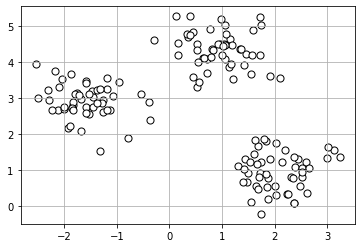

In [2]:
# Graficacion del conjunto de datos
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.scatter(X[:, 0], X[:, 1], c='white', marker='o', edgecolor='black', s=50)
ax.grid();

Dado que no tenemos ninguna informacion de las caracteristicas, debemos agrupar por semejanzas, lo cual se hace en los siguientes 4 pasos:

1. Selecciona aleatoriamente *k* centroides a partir de los puntos de muestra como centros de grupo iniciales.
2. Asigna cada muestra al centroide mas cercano $u_j$, $j \in {1, 2, \dots , k}$.
3. Desplaza los centroides al centro de las muestras asignadas para ello.
4. Repita los pasos 2 y 3 hasta que las asignaciones de grupos no cambien o hasta conseguir una tolerancia definida por el usuario o el numero maximo de iteraciones.

La forma de determinar la semejanza ente objetos es a partir de la distancia euclidiana, de tal manera que entre mas alejados esten dos objetos, menos semejantes son, es decir, la semjanza sera lo opuesto a la distancia; recordemos que la distancia euclidiana se define como:

$$d(\vec{x}, \vec{y})=\sum_{j=1}^m(x_j-y_j)^2=||\vec{x}-\vec{y}||^2_2$$

En la ecuaion anterior *j* se refieres a la *j*-esima dimension(columna) de las muestras $\vec{x}$ y $\vec{y}$. 

El algoritmo tratara de minimizar la Suma de Errores Cuadraticos SSE dentro del grupo:

$$SSE=\sum_{i=1}^n\sum_{j=k}^{centroides} w^{(i,j)}||\vec{x}^{(i)}-\vec{\mu}^{(j)}||^2_2$$

$\vec{\mu}^{(j)}$ es el centroide para el grupo *j*, y $w^{(i,j)} = 1$ si la muestra $\vec{x}^{(i)}$ esta en el grupo *j*, sino $w^{(i,j)} = 0$.

Dado que el algoritmo utiliza la distancia euclidiana para medir las distancias, es recomendable escalar las caracteristicas cuando se trabaje con medidas reales.

In [3]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=3, init='random', n_init=10, max_iter=300, tol=1e-04, random_state=0)
# n_init realizara el algoritmo 10 veces con diferentes centroides. Se eligira el que tenga SSE mas bajo
y_km = km.fit_predict(X)
y_km

array([2, 1, 1, 1, 2, 1, 1, 2, 0, 1, 2, 0, 0, 1, 1, 0, 0, 2, 0, 2, 1, 2,
       1, 1, 0, 2, 2, 1, 0, 2, 0, 0, 0, 0, 1, 2, 2, 2, 1, 1, 0, 0, 1, 2,
       2, 2, 0, 1, 0, 1, 2, 1, 1, 2, 2, 0, 1, 2, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 2, 1, 1, 1, 2, 2, 1, 2, 1, 1, 0, 0, 1, 2, 2, 1, 1, 2, 2, 2, 0,
       0, 2, 2, 1, 2, 1, 2, 1, 0, 0, 2, 2, 2, 2, 0, 2, 2, 1, 0, 1, 1, 1,
       0, 1, 2, 0, 1, 0, 1, 1, 0, 0, 1, 2, 1, 1, 2, 2, 0, 2, 0, 0, 0, 0,
       2, 0, 0, 0, 1, 0, 2, 0, 1, 1, 2, 2, 0, 0, 0, 0, 2, 2])

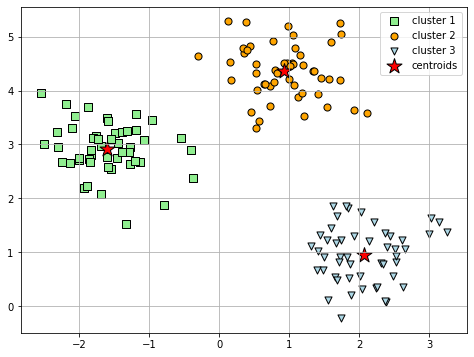

In [4]:
fig, ax =plt.subplots(figsize = (8, 6))
ax.scatter(X[y_km == 0, 0], X[y_km == 0, 1], s=50, c='lightgreen', marker='s', edgecolor='black', label='cluster 1')
ax.scatter(X[y_km == 1, 0], X[y_km == 1, 1], s=50, c='orange', marker='o', edgecolor='black', label='cluster 2')
ax.scatter(X[y_km == 2, 0], X[y_km == 2, 1], s=50, c='lightblue', marker='v', edgecolor='black', label='cluster 3')
ax.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], s=250, marker='*', c='red', edgecolor='black', 
            label='centroids')
ax.legend(scatterpoints=1)
ax.grid()

Como se puede observar, los datos fueron asignados a una clase diferente segun sus semejanzas en terminos de las 2 caracteristicas, y que cada una de las categorias estan representadas por los promedios (centroides) de las ubicaciones de los datos (estrellas rojas). Es muy importante recordar que los centroides no iniciaron en esa posicion sino que fueron ubicados alli despues de cierto numero de iteraciones; su posicion inicial es, hasta cierto punto, desconocida, pues se inicializa con el parametro `init='random'`, lo cual puede llegar a ser un inconveniente en terminos computacionales, ya que podrian inicializarse en alguna ubicacion que llevara a mayores tiempos de ejecucion y a algunas dificultades en los calculos. Para esto existe una solucion, la cual es inicializar los centroides de una manera mas inteligente con la herramienta `k-means++`.

<div class="burk">
EJERCICIO</div><i class="fa fa-lightbulb-o "></i>

Utilizando el archivo `Mall_Customers.csv` realice un proceso de `clustering`; para fines de visualizacion solo utilice las dos ultimas columnas. Utilice 5 *clusters* y grafique sus resultados. Evalue la conveniencia de escalar.

## Una manera mas inteligente de colocar los centroides con k-means++

La idea central de este algoritmo es muy simple: inicializar los centroides de tal manera que queden lejos unos de otros. Su algoritmo se puede tomar de la siguiente manera:

1. Inicializa un conjunto vacio **M** para almacenar los centroides *k* que han sido seleccionados.
2. Aleatoriamente elige el primer centroide **$\mu^{(i)}$** de las muestras de entrada y las asigna a **M**.
3. Para cada muestra **$x^{(i)}$** que no esta en **M**, encuentra la distancia minima cuadratica $d(\textbf{x}^{(i)}, \textbf{M})^2$ hasta cada uno de los centroides en **M**.
4. Para seleccionar aleatoriamente el siguiente centroide **$\mu^{(p)}$**, utiliza una distribucion de probabilidad ponderada igual a $\frac{d(\textbf{x}^{(p)}, \textbf{M})^2}{\sum_i d(\textbf{x}^{(i)}, \textbf{M})^2}$.
5. Repite los pasos 2 y 3 hasta elegir los *k* centroides.
6. Sigue adelante con el algoritmo k-means clasico. 

In [ ]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=3, init='k-means++', n_init=10, max_iter=300, tol=1e-04, random_state=0)
# n_init realizara el algoritmo 10 veces con diferentes centroides. Se eligira el que tenga SSE mas bajo
y_km = km.fit_predict(X)

In [ ]:
fig, ax =plt.subplots(figsize = (8, 6))
ax.scatter(X[y_km == 0, 0], X[y_km == 0, 1], s=50, c='lightgreen', marker='s', edgecolor='black', label='cluster 1')
ax.scatter(X[y_km == 1, 0], X[y_km == 1, 1], s=50, c='orange', marker='o', edgecolor='black', label='cluster 2')
ax.scatter(X[y_km == 2, 0], X[y_km == 2, 1], s=50, c='lightblue', marker='v', edgecolor='black', label='cluster 3')
ax.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], s=250, marker='*', c='red', edgecolor='black', 
            label='centroids')
ax.legend(scatterpoints=1)
ax.grid()

## Agrupamiento pesado frente a no pesado

El agrupamiento pesado (***Hard Clustering***) se refiere a una familia de algoritmos en la cual cada muestra se asigna exactamente a un grupo, como lo hicimos con k-means antes. Por el contrario, los algortimos de agrupamiento no pesado (***Soft Clustering***), asignan una muestra a uno o mas grupos. Un ejemplo popular de este tipo de algortimos es el conocido como **fuzzy C-means (FCM): $J_m$**.

Su funcionamiento es muy similar al algoritmo k-means, pero en vez de asignar punto a categorias, sustituimos con probabilidades de que cada punto pertenezca a cierta categoria. Por ejemplo, en k-means podriamos expresar el miembro del grupo de una muestra *x* con un vector disperso de valores binarios:

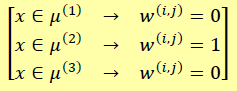

La posicion del indice con el valor 1 indica el centroide del grupo **$\mu^{(i)}$** al que se asigna la muestra (suponiendo que $k=3$, $j \in \{1,2,3\}$. Por el contrario, un vector perteneciente al FCM podria ser representado con valores porbabilisticos en vez de valores absolutos:

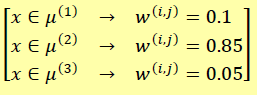

En este caso, cada valor cae en el rango $[0,1]$  y representa la probabilidad de pertenencia al grupo del respectivo centroide. La suma, por supuesto, es igual a 1 pues no existen mas grupos.

El algoritmo se puede resumir en los siguientes pasos:
1. Especificar el numero de centroides y, aleatoriamente, asignar los miembros del grupo para cada punto.
2. Calcular los centroides del grupo $\mu^{(j)}$, $j\in \{1, \dots ,k\}$
3. Actualizar los miembros del grupo para cada punto. 
4. Repetir los pasos 2 y 3 hasta que los coeficientes de los iembros no cambien o hasta alcanzar la tolerancia definida por el ususario o el numero maximo de iteraciones.

La funcion objetivo del FCM es la siguiente:

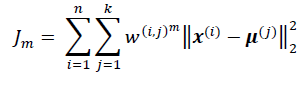

sin embargo, cabe recordar que $w^{(i,j)}$ no pertenece a la clase binaria $(0,1)$, sino que representa valores probabilisticos pertenenecientes al intervalo $[0,1]$. Em valor de $m$ se conoce como coeficiente de difusion, y entre mas grande sea, menor probabilidad habra de pertenecer al grupo $w^{(i,j)}$.

La probabilidad de pertenencia al grupo se calcula del siguiente modo:

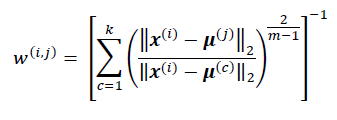

El centro $\mu^{(j)}$ se calcula como sigue:

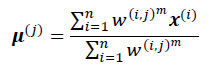

Despues de todo lo dicho, cabe mencionar que sklearn no implementa el algoritmo FCM; afortunadamente los resultados de FCM son muy similares a los del algoritmo k-means con k-means++.

<div class="burk">
EJERCICIO</div><i class="fa fa-lightbulb-o "></i>

Utilice al dataset del anterior ejercicio para realizar un agrupamiento de caracteristicas, pero esta vez utilice las tres ultimas columnas; para poder visualizar, realice previamente una extraccion de caracteristicas usando PCA para 2 componentes. Dado que es bastante util el escalamiento, aproveche para reducir sus lineas creando un pipeline con las tres operaciones: escalamiento, PCA, modelo k-means.

Grafique sus resultados.

## Encontrar el numero optimo de grupos: metodo Elbow

Una de las dificultades del aprendizaje no supervisado, es el evaluar el rendimiento del algoritmo ya que no poseemos etiquetas de referencia para comparar, y no sabemos que tan bien lo esta haciendo el modelo. Una de las posibilidades que tenemos para abarcar este problema es la medida *SSE* que hemos venido utilizando, el cual puede ser obtenido desde el mismo algoritmo con el parametro `inertia_`:

In [ ]:
print(f'Distorsion: {km.inertia_}')

Basando en el valor *SSE*, podemos evaluar el numero optimo de grupos, considerando el siguiente hecho: Mientras mas grupos haya, menor sera el SSE. Si calculamos el *SSE* para diferentes valores de *k*, podemos graficar *SSE* vs *k* y asi saber cual es la mejor opcion.

In [ ]:
distortions = []
for i in range(1, 11):
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=300)
    km.fit(X)
    distortions.append(km.inertia_)

fig, ax = plt.subplots()    
ax.plot(range(1,11), distortions, marker='o')
ax.set_xlabel('Numero de clusters')
ax.set_ylabel('Distorsion')
ax.set_xticks(range(1, 11));

El truco esta en tomar el valor de *k* para el cual la distorsion empieza a cambiar rapidamente; de nuestro resultado, se puede observar que *k=3* es una buena eleccion de grupos.

## Cuantificar la calidad de la agrupacion mediante los graficos de silueta

Esta tecnica funciona con diversos algoritmos de agrupamiento; para calcular el ***coeficiente de silueta*** de una muestra unica, podemos seguir los siguientes pasos:
1. Calcular la **cohesion del grupo** $a^{(i)}$ como la distancia media entre una muestra **$x^{(i)}$ y el resto de puntos en el mismo grupo.
2. Calcular la **separacion de grupo** $b^{(i)}$ a partir del grupo mas cercano como la distancia media entre la muestra **$x^{(i)}$** y todas las muestras en el grupo mas cercano.
3. Calcular la silueta $s^{(i)}$ con la diferencia entre la cohesion y la separacion del grupo dividida por el mas grande de los dos:
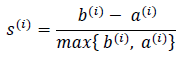

El valor del coeficiente de silueta esta entre -1 y 1. 

In [ ]:
import numpy as np
from matplotlib import cm
from sklearn.metrics import silhouette_samples

km = KMeans(n_clusters=3, init='k-means++', n_init=10, max_iter=300, tol=1e-04)
y_km = km.fit_predict(X)

cluster_labels = np.unique(y_km)
# Etiquetas dadas a los clusters por k-means

n_clusters = cluster_labels.shape[0]
# Cantidad de clusters

silhouette_vals = silhouette_samples(X, y_km, metric='euclidean')
# se obtendra un valor por cad muestra, es decir, la misma cantidad de elementos que filas en X

#silhouette_vals

In [ ]:
y_ax_lower, y_ax_upper = 0, 0
yticks = []

for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    
    y_ax_upper += len(c_silhouette_vals)
    color = ['turquoise', 'slateblue', 'coral']
    
    plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0, edgecolor='none', color=color[i])

    yticks.append((y_ax_lower + y_ax_upper) / 2.)
    y_ax_lower += len(c_silhouette_vals)
    
silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg, color="red", linestyle="--") 

plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')

plt.tight_layout()
plt.show()

Para que se entienda el resultado, debemos tener encuenta que el valor maximo es de 1; entre mas cercano estemos de 1, para un color en particular, podemos decir que la muestra correspondiente esta bien emparejada cono los elementos de su grupo, y mal emparejada con los miembros de otros grupos. Si la mayoría de los objetos tienen un valor alto, entonces la configuración del grupo es apropiada. Si muchos puntos tienen un valor bajo o negativo, entonces la configuración de grupo puede tener demasiados o muy pocos grupos. 

In [ ]:
# Un grupo mal clasificado
km = KMeans(n_clusters=2, init='k-means++', n_init=10, max_iter=300, tol=1e-04)
y_km = km.fit_predict(X)

plt.scatter(X[y_km == 0, 0], X[y_km == 0, 1], s=50, c='lightgreen', edgecolor='black', marker='s', label='cluster 1')
plt.scatter(X[y_km == 1, 0], X[y_km == 1, 1], s=50, c='orange', edgecolor='black', marker='o', label='cluster 2')

plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], s=250, marker='*', c='red', label='centroids')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

In [ ]:
cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]
silhouette_vals = silhouette_samples(X, y_km, metric='euclidean')
y_ax_lower, y_ax_upper = 0, 0
yticks = []
for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    
    plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0, edgecolor='none', color=color[i])
    color = ['turquoise', 'slateblue']
    yticks.append((y_ax_lower + y_ax_upper) / 2.)
    y_ax_lower += len(c_silhouette_vals)
    
silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg, color="red", linestyle="--") 

plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')

plt.tight_layout()
plt.show()

<div class="burk">
EJERCICIO
</div><i class="fa fa-lightbulb-o "></i>

 Con el conjunto de datos del ejercicio anterior, construya un diagrama *Elbow* para estimar cual es el valor *k* mas adecuado. Cree un modelo con ese valor de  *k* y grafique un diagrama de siluetas para verificar la bondad de su agrupamiento. 